<a href="https://colab.research.google.com/github/neilprado/machineLearning/blob/master/Ecoli_All_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pl

url = 'https://raw.githubusercontent.com/neilprado/machineLearning/master/ecoli.data'

col_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'label']
feature_cols = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']

dataset = pd.read_csv(url, header=None, names=col_names)
x = dataset[feature_cols]
y = dataset.label

decisionTreeHits = []
decisionTreeErrors = []
knnHits5 = []
knnErrors5 = []
knnHits10 = []
knnErrors10 = []
mlpHits1 = []
mlpErrors1 = []
mlpHits2 = []
mlpErrors2 = []
kmeansHits= []
kmeansErrors = []

for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i, stratify=y)

  dtModel = tree.DecisionTreeClassifier(criterion="entropy")
  dtModel = dtModel.fit(x_train, y_train)
  dtResult = dtModel.predict(x_test)
  dtAcc = metrics.accuracy_score(dtResult, y_test)
  dtShow = round(dtAcc * 100)

  decisionTreeHits.append(dtShow)
  decisionTreeErrors.append(100 - decisionTreeHits[i])

  k5model = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
  k5model = k5model.fit(x_train, y_train)
  k5Result = k5model.predict(x_test)
  k5Acc = metrics.accuracy_score(k5Result, y_test)
  k5Show = round(k5Acc * 100)

  knnHits5.append(k5Show)
  knnErrors5.append(100 - knnHits5[i])

  k10model = KNeighborsClassifier(n_neighbors=10, metric='manhattan', weights='distance')
  k10model = k10model.fit(x_train, y_train)
  k10Result = k10model.predict(x_test)
  k10Acc = metrics.accuracy_score(k10Result, y_test)
  k10Show = round(k10Acc * 100)

  knnHits10.append(k10Show)
  knnErrors10.append(100 - knnHits10[i])

  mlpModel1 = MLPClassifier(hidden_layer_sizes=(10,8), activation='tanh', max_iter=3000)
  mlpModel1 = mlpModel1.fit(x_train, y_train)
  mlpresult1 = mlpModel1.predict(x_test)
  mlpAcc1 = metrics.accuracy_score(mlpresult1, y_test)
  mlpShow1 = round(mlpAcc1 * 100)

  mlpHits1.append(mlpShow1)
  mlpErrors1.append(100 - mlpHits1[i])


  mlpModel2 = MLPClassifier(hidden_layer_sizes=(8,6), activation='tanh', max_iter=3000)
  mlpModel2 = mlpModel2.fit(x_train, y_train)
  mlpresult2 = mlpModel2.predict(x_test)
  mlpAcc2 = metrics.accuracy_score(mlpresult2, y_test)
  mlpShow2 = round(mlpAcc2 * 100)

  mlpHits2.append(mlpShow2)
  mlpErrors2.append(100 - mlpHits2[i])

  kmeansModel = KMeans(n_clusters=9, max_iter=300)
  kmeansModel = kmeansModel.fit(x_train, y_train)
  kmeansResult = kmeansModel.predict(x_test)
  kmeansAcc = metrics.accuracy_score(kmeansResult, y_test)
  kmeansShow = round(kmeansAcc * 100)

  kmeansHits.append(kmeansShow)
  kmeansErrors.append(100 - kmeansHits[i])

  print("K-Means", kmeansShow)



K-Means 47.0
K-Means 16.0
K-Means 19.0
K-Means 0.0
K-Means 21.0
K-Means 0.0
K-Means 1.0
K-Means 29.0
K-Means 18.0
K-Means 26.0


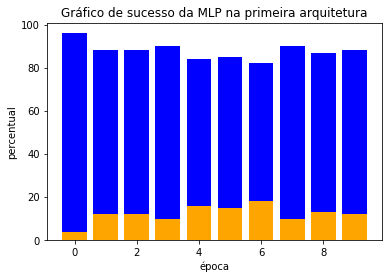

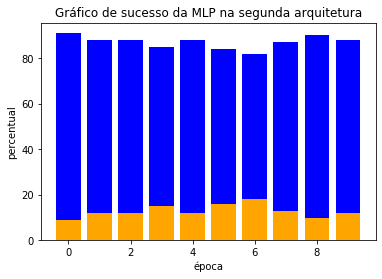

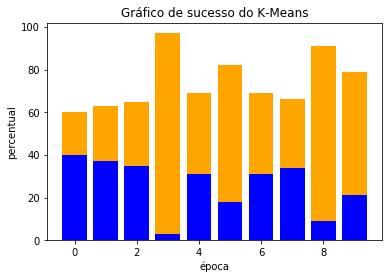

[96.0, 88.0, 88.0, 90.0, 84.0, 85.0, 82.0, 90.0, 87.0, 88.0]
[91.0, 88.0, 88.0, 85.0, 88.0, 84.0, 82.0, 87.0, 90.0, 88.0]
[40.0, 37.0, 35.0, 3.0, 31.0, 18.0, 31.0, 34.0, 9.0, 21.0]


In [0]:
successMLP1 = [x for x in range(len(mlpHits1))]
failureMLP1 = [x for x in range(len(mlpErrors1))]
pl.bar(successMLP1, mlpHits1, color='blue')
pl.bar(failureMLP1, mlpErrors1, color='orange')
pl.xlabel('época')
pl.ylabel('percentual')
pl.title('Gráfico de sucesso da MLP na primeira arquitetura')
pl.show()

successMLP2 = [x for x in range(len(mlpHits2))]
failureMLP2 = [x for x in range(len(mlpErrors2))]
pl.bar(successMLP2, mlpHits2, color='blue')
pl.bar(failureMLP2, mlpErrors2, color='orange')
pl.xlabel('época')
pl.ylabel('percentual')
pl.title('Gráfico de sucesso da MLP na segunda arquitetura')
pl.show()

successKMeans = [j for j in range(len(kmeansHits))]
failureKMeans = [j for j in range(len(kmeansErrors))]

pl.bar(failureKMeans, kmeansErrors, color='orange')
pl.bar(successKMeans, kmeansHits, color='blue')
pl.xlabel('época')
pl.ylabel('percentual')
pl.title('Gráfico de sucesso do K-Means')
pl.show()

print(mlpHits1)
print(mlpHits2)
print(kmeansHits)

df = pd.DataFrame({'Taxa de Acerto - Árvore de Decisão': decisionTreeHits, 
                   'Taxa de Erro - Árvore de Decisão': decisionTreeErrors, 
                   'Taxa de acerto - KNN(5)': knnHits5, 'Taxa de Erro - KNN(5)': knnErrors5,
                   'Taxa de acerto - KNN(10)': knnHits10, 'Taxa de Erro - KNN(10)': knnErrors10})
#print(df.sort_values(by='Taxa de Acerto'))
df.to_csv("ecoli.csv", sep=',', index=False)

In [0]:
from google.colab import drive
drive.mount('/content/drive')